# Prelucrarea Semnalelor
## Laborator 2
### Miu Elena Adania
### Grupa 333

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io import wavfile

## Ex1. 
### Generati un semnal sinusoidal de tip sinus, de amplitudine, frecventa si faza aleasa de voi. Generati apoi un semnal de tip cosinus astfel incat pe orizontul de timp ales, acesta sa fie identic cu semnalul sinus. Verificati afisandu-le grafic in doua subplot-uri diferite.

In [2]:
frequency = 2
time = np.arange(0, 1, 0.001)

In [3]:
# Generate signals
signal_sin = np.sin(2 * np.pi * frequency * time + np.pi / 2)

signal_cos = np.cos(2 * np.pi * frequency * time)

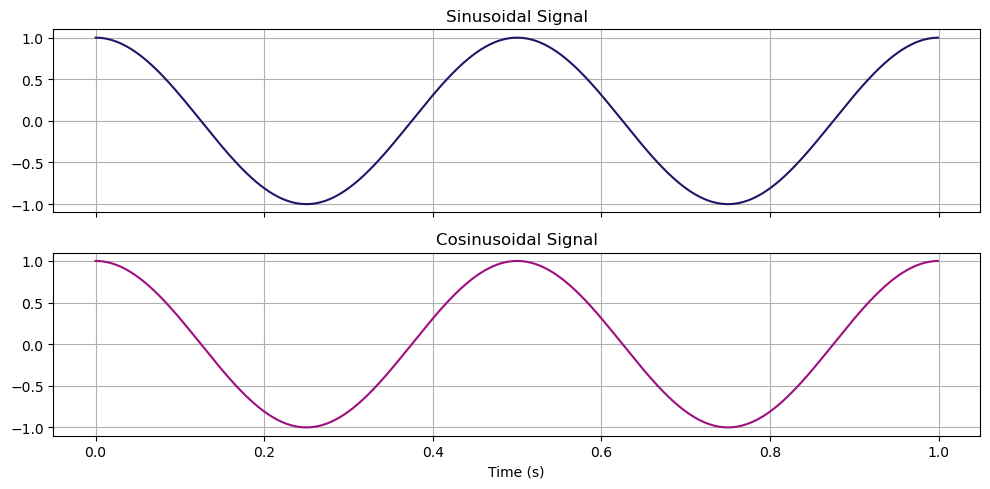

In [4]:
# Plot the signals

figure, axis = plt.subplots(2, sharex=True, figsize=(10, 5))

axis[0].set_title('Sinusoidal Signal')
axis[0].plot(time, signal_sin, color='#241468')

axis[1].set_title('Cosinusoidal Signal')
axis[1].plot(time, signal_cos, color='#9F0D7F')

axis[1].set_xlabel('Time (s)')

for ax in axis:
    ax.grid(True)
    
plt.tight_layout()

plt.show()

## Ex2.
### 2. Generati un semnal sinusoidal de amplitudine unitara si frecventa aleasa de voi. Incercati 4 valori diferite pentru faza. Afisati toate semnalele pe acelasi grafic. Adaugati zgmot aleator sinusoidelor esantionate generate.
### Noul semnal este x[n] + γz[n] astfel incat raportul semnal zgomot (Signal to Noise Ratio sau SNR) sa fie {0.1, 1, 10, 100}. SNR este definit astfel: 
### SNR = ∥x∥2 2 / y^2 * ∥z∥2 2
### Vectorul z este generat esantionand distributia Gaussiana standard iar parametrul γ se calculeaza astfel incat sa avem valorile SNR dorite.


In [5]:
fs = 1000
time = np.arange(0, fs)
frequency = 10

phases = [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4]

In [6]:
# Generate signals
x = []
for phase in phases:
    x.append(np.sin(2 * np.pi * frequency * time / fs + phase))

In [7]:
# Add noise
snrs = [0.1, 1, 10, 100]
y = []

for snr in snrs:
    z = np.random.normal(0, 1, len(time))
    gamma = np.sqrt(np.linalg.norm(x[0])**2 / (snr * np.linalg.norm(z)**2))
    y.append(x[0] + gamma * z)

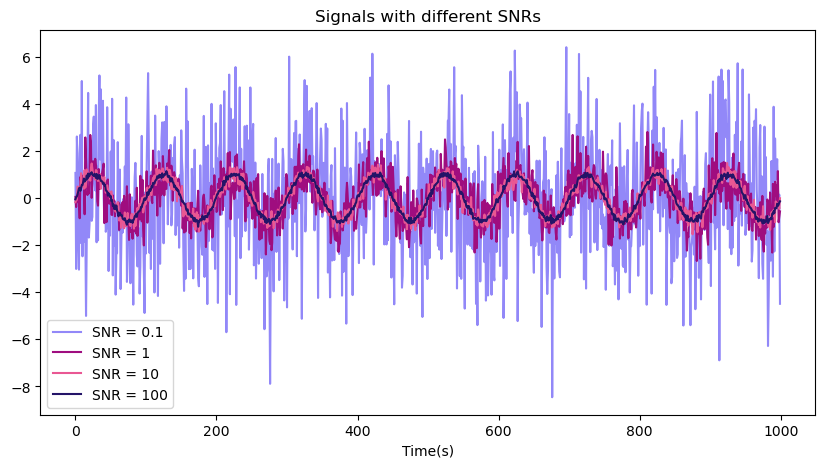

In [8]:
# Plot signals
colors = ['#9288F8','#9F0D7F', '#E95793',   '#241468']
plt.figure(figsize=(10, 5))
for i, snr in enumerate(snrs):
    plt.plot(time, y[i], label=f'SNR = {snr}', color=colors[i])

plt.legend()
plt.xlabel('Time(s)')
plt.title('Signals with different SNRs')
plt.show()

## Ex3.
### Ascultati semnalele pe care le-ati generat la laboratorul precedent pentru exercitiile 2.(a)-(d) folosind biblioteca sounddevice. 
### Salvati unul din semnale ca fisier .wav si verificati ca il puteti incarca de pe disc utilizand scipy.io.wavfile.read().


In [9]:
# signal a
frequency = 400
samples = 1600
period = 1.0 / frequency
sampling_period = period / samples

time = np.linspace(0, samples * sampling_period, samples)
x = np.sin(2 * np.pi * frequency * time)

# Play Signal a
sd.play(x, 44100)
sd.wait()

# Save signal a as .wav file
wavfile.write("output_signal.wav", int(10e5), x)

# Upload Signal a .wav file
fs, signal_read = wavfile.read("output_signal.wav")

if np.array_equal(x, signal_read):
    print("Signal saved and read successfully.")
else:
    print("Error.")

Signal saved and read successfully.


## Ex4.
### Generati doua semnale cu forme de unda diferite (ex., unul sinusoidal, celalalt sawtooth) si adunati-le esantioanele. Afisati grafic cele doua semnale initiale si suma lor, fiecare in cate un subplot.


In [10]:
frequency = 1000 
time = np.arange(0, 1, 1 / frequency) 
fqr_sin = 5 
fqr_sawtooth = 2

In [11]:
# Generate Signals
signal_sin = np.sin(2 * np.pi * fqr_sin * time)

signal_sawtooth = 0.5 * ( time * fqr_sawtooth - np.floor(0.5 + time * fqr_sawtooth))

# Sum signals
signal_sum = signal_sin + signal_sawtooth

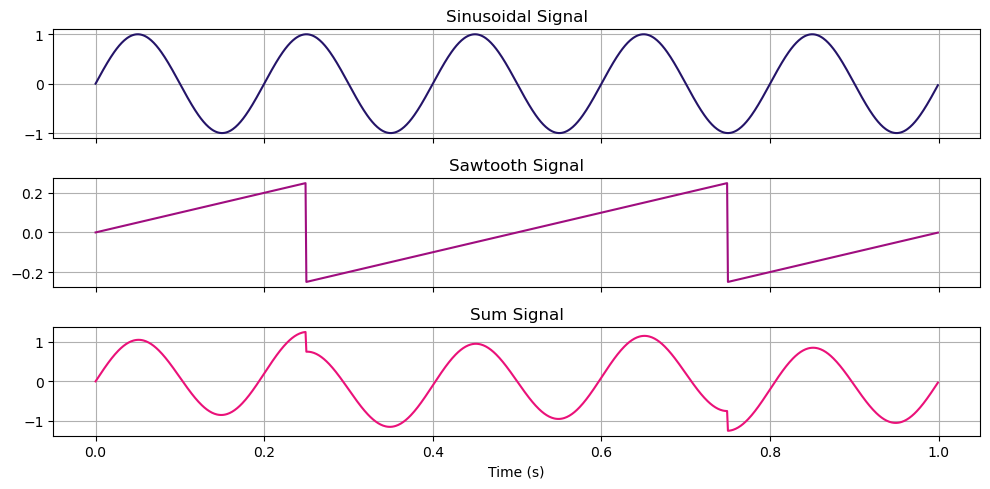

In [12]:
# Plot the signals

figure, axis = plt.subplots(3, sharex=True, figsize=(10, 5))

axis[0].set_title('Sinusoidal Signal')
axis[0].plot(time, signal_sin, color='#241468')

axis[1].set_title('Sawtooth Signal')
axis[1].plot(time, signal_sawtooth, color='#9F0D7F')

axis[2].set_title('Sum Signal')
axis[2].plot(time, signal_sum, color='#EA1179')

axis[2].set_xlabel('Time (s)')

for ax in axis:
    ax.grid(True)
    
plt.tight_layout()

plt.show()

## Ex5.
### Generati doua semnale cu aceeasi forma de unda, dar de frecvente diferite, si puneti-le unul dupa celalalt in acelasi vector. Redati audio rezultatul si notati ce observati.

In [13]:
f1 = 440
f2 = 660
period = 3
time = np.linspace(0, period, period * 44100)

In [14]:
signal1 = np.sin(2 * np.pi * f1 * time)
signal2 = np.sin(2 * np.pi * f2 * time)
signal = np.concatenate((signal1, signal2))

In [15]:
sd.play(signal)
sd.wait()

#### Primul sunet este mai jos, urmat de al doilea care este mai inalt, din cauza frecventei mai mari

## Ex6. 
### Generati 3 semnale de tip sinus cu amplitudine unitara si faza nula avand frecventele fundamentale:
#### a) f = fs / 2
#### b) f = fs / 4
#### c) f = 0 Hz
#### unde fs este frecventa de esantionare, aleasa de voi. Notati ce observati.

In [16]:
fs = 8
period = 4
samples = int(fs * period)
time = np.linspace(0, period, samples, endpoint=False)

In [17]:
# Generate signals

# a) Signal with frequency f = fs / 2
f_a = fs / 2
signal_a = np.sin(2 * np.pi * f_a * time)

# b) Signal with frequencyf = fs / 4
f_b = fs / 4
signal_b = np.sin(2 * np.pi * f_b * time)

# c) Signal with frequency f = 0 Hz
f_c = 0
signal_c = np.ones(samples)

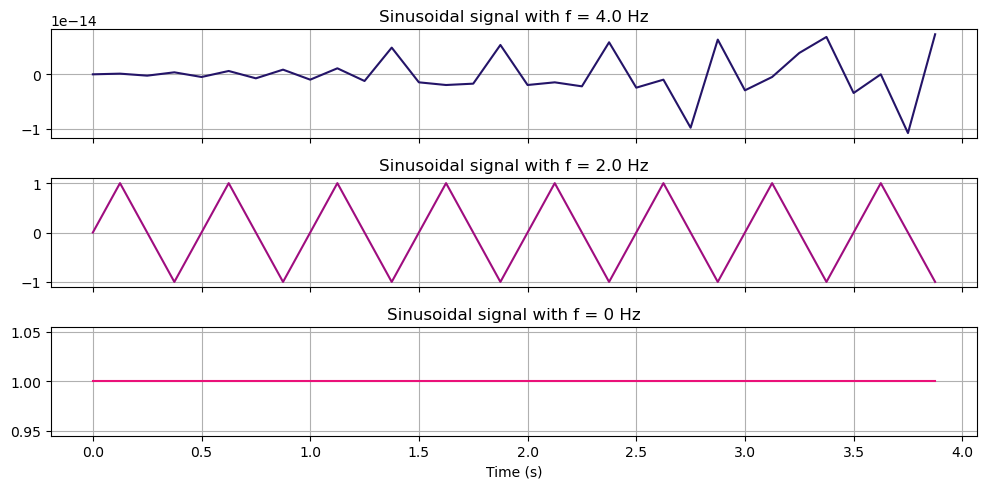

In [18]:
# Plot signals
figure, axis = plt.subplots(3, sharex=True, figsize=(10, 5))

axis[0].plot(time, signal_a, color='#241468')
axis[0].set_title(f"Sinusoidal signal with f = {f_a} Hz")

axis[1].plot(time, signal_b, color='#9F0D7F')
axis[1].set_title(f"Sinusoidal signal with f = {f_b} Hz")

axis[2].plot(time, signal_c, color='#EA1179')
axis[2].set_title(f"Sinusoidal signal with f = {f_c} Hz")

axis[2].set_xlabel('Time (s)')

for ax in axis:
    ax.grid(True)

plt.tight_layout()
plt.show()

## Ex7.
### Generati un semnal sinusoidal cu frecventa de esantionare 1000 Hz si decimati-l la 1/4 din frecventa initiala (pastrati doar al 4-lea fiecare element din vector):
### a) Afisati grafic cele doua semnale si comentati diferentele.
### b) Repetati decimarea (tot la 1/4 din frecventa initiala) pornind acum de la al doilea element din vector. Ce observati?


In [19]:
fs = 100
f = 1000
period = 0.01
time = np.arange(0, period, 1 / f)

In [20]:
signal = np.sin(2 * np.pi * fs * time)
signal_a = signal[::4]
signal_b = signal[1::4]

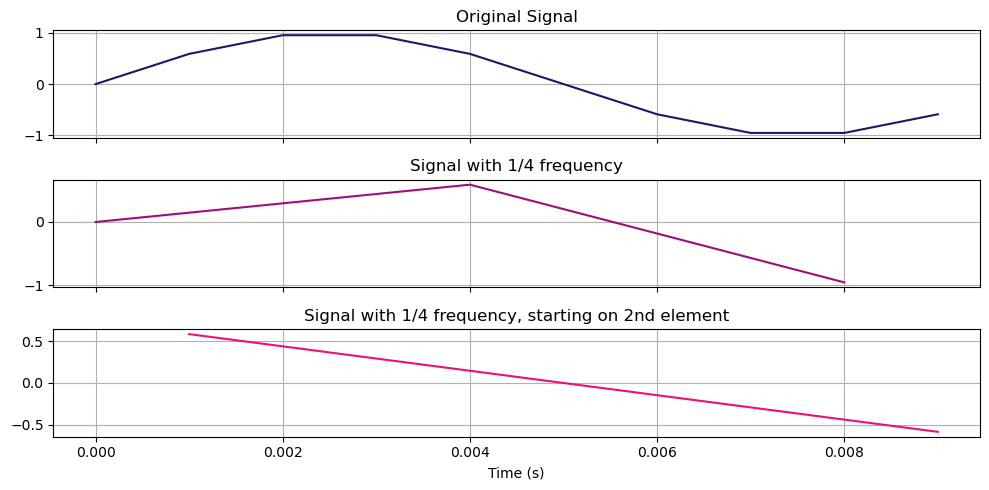

In [21]:
# Plot signals
figure, axis = plt.subplots(3, sharex=True, figsize=(10, 5))

axis[0].plot(time, signal, color='#241468')
axis[0].set_title("Original Signal")

axis[1].plot(time[::4], signal_a, color='#9F0D7F')
axis[1].set_title("Signal with 1/4 frequency")

axis[2].plot(time[1::4], signal_b, color='#EA1179')
axis[2].set_title("Signal with 1/4 frequency, starting on 2nd element")

axis[2].set_xlabel('Time (s)')

for ax in axis:
    ax.grid(True)

plt.tight_layout()
plt.show()

## Ex8. 
### In practica se opereaza des cu urmatoarea aproximare: pentru valori mici ale lui α, sin(α) ≈ α. 
### Verificati daca aceasta aproximare este corecta, reprezentand grafic cele doua curbe pentru valori ale lui α in intervalul [−π / 2, π / 2]. 
### Aratati si un grafic cu eroarea dintre cele doua functii.
### Folositi si aproximarea Pade sin(α) ≈ (α − 7 * α^3 / 60) / (1 + α^2 / 20), nu doar Taylor. 
### Afisati rezultatele si pe un grafic unde axa 0y este logaritmica.

In [22]:
alpha = np.linspace(-np.pi / 2, np.pi / 2, 1000)

In [23]:
sin_alpha = np.sin(alpha)

In [24]:
taylor_approx = alpha

pade_aprox = (alpha - 7 * alpha**3 / 60) / (1 + alpha**2 / 20)

In [25]:
error = np.abs(sin_alpha - taylor_approx)

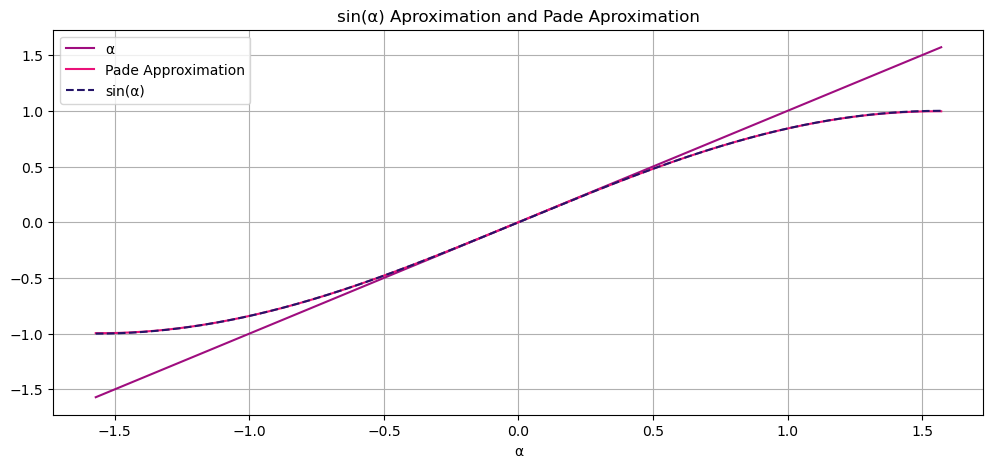

In [27]:
plt.figure(figsize=(12, 5))

plt.plot(alpha, taylor_approx, label='α', color='#9F0D7F')

plt.plot(alpha, pade_aprox, label='Pade Approximation', color='#EA1179')

plt.plot(alpha, sin_alpha, label='sin(α)', linestyle='--', color='#241468')

plt.xlabel('α')
plt.legend()
plt.title('sin(α) Aproximation and Pade Aproximation')

plt.grid(True)
plt.show()

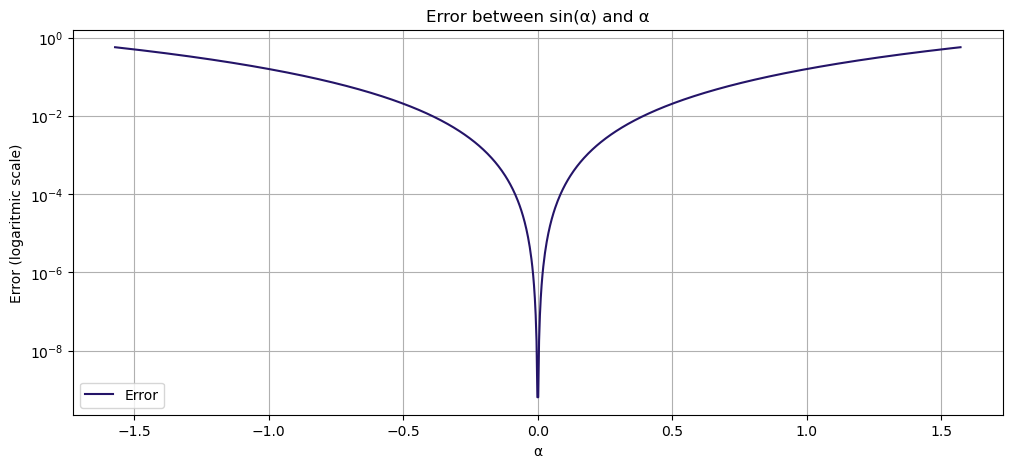

In [28]:
plt.figure(figsize=(12, 5))

plt.semilogy(alpha, error, label='Error', color='#241468')

plt.xlabel('α')
plt.ylabel('Error (logaritmic scale)')

plt.legend()
plt.title('Error between sin(α) and α')

plt.grid(True)
plt.show()